# Naive Bayes classification example
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

---

This notebook demonstrates solving a classificiation problem of predicting wine classes with `GaussianNB` estimator of **Scikit-learn** library.

The dataset is taken from UCI ML repository.
<br>Here is the link: http://archive.ics.uci.edu/ml/datasets/Wine

### Where is it used?
The [Naive Bayes Classifier](http://dataaspirant.com/2017/02/06/naive-bayes-classifier-machine-learning/) technique is based on the so-called Bayesian theorem and is particularly suited when the dimensionality of the inputs is high. Despite its simplicity, Naive Bayes can often outperform more sophisticated classification methods.

### Bayes' Theorem

The algorithm is based on the famous [___Bayes theorem___](https://en.wikipedia.org/wiki/Bayes%27_theorem) named after Rev. Thomas Bayes. It works on conditional probability. [Conditional probability](https://en.wikipedia.org/wiki/Conditional_probability) is the probability that something will happen, given that something else has already occurred. Using the conditional probability, we can calculate the probability of an event using its prior knowledge.

Bayes' theorem is stated mathematically as the following equation:

$$ P(A\mid B)={\frac {P(B\mid A).P(A)}{P(B)}}$$
where $A$ and $B$ are events and $P(B)\neq{0}$.

$P(A\mid B)$ is a [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability): the likelihood of event $A$ occurring given that $B$ is true.

$P(B\mid A)$ is also a conditional probability: the likelihood of event $B$ occurring given that $A$ is true.

$P(A)$ and $P(B)$ are the probabilities of observing $A$ and $B$ independently of each other; this is known as the [marginal probability](https://en.wikipedia.org/wiki/Marginal_probability).

In the equation,
- the term $P(A\mid B)$ is called the **Posterior**
- the term $P(B\mid A)$ is called **Likelihood**, 
- the term $P(A)$ is called the **Prior** (it represents the prior belief about the event)

### What's _Naive_ in Naive Bayes and why is it a super fast algorithm?

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value, they are assumed to be conditionally independent given the target value.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

Training is fast because only the probability of each class and the probability of each class given different input values need to be calculated. **No coefficients need to be fitted by optimization procedures.**

The class probabilities are simply the frequency of instances that belong to each class divided by the total number of instances. The conditional probabilities are the frequency of each attribute value for a given class value divided by the frequency of instances with that class value.

### Data analyzed in this notebook

In this notebook, we will show how to use Python scikit-learn's Naive Bayes method to classify origin of wine based on physio-chemical analysis data. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Details can be [**found here**](http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read in the data

In [2]:
df = pd.read_csv('Data/wine.data.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### Basic statistics of the features

In [3]:
df.iloc[:,1:].describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


### How many wine classes are there?

In [4]:
df['Class'].unique()

array([1, 2, 3], dtype=int64)

### Boxplots by output labels/classes

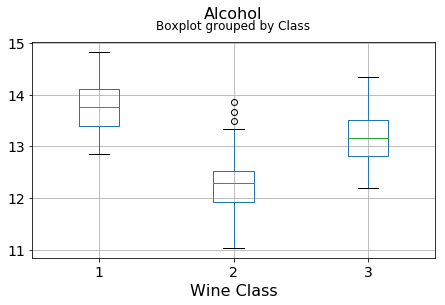

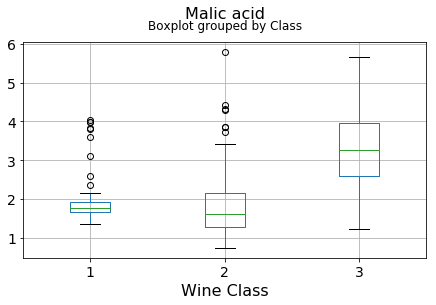

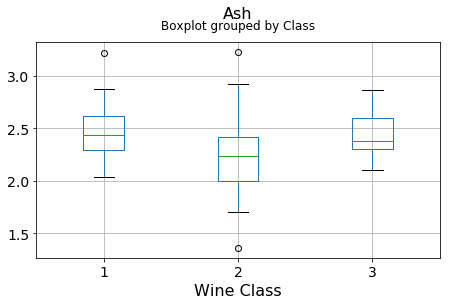

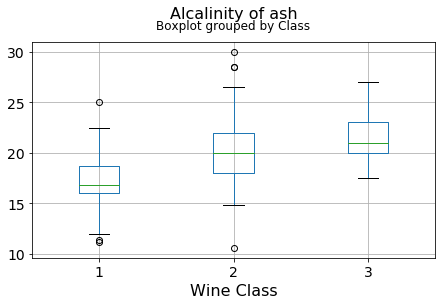

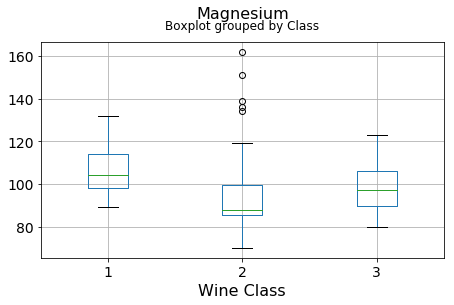

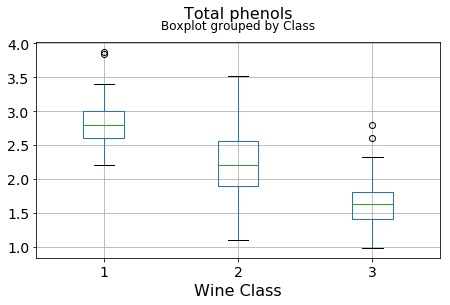

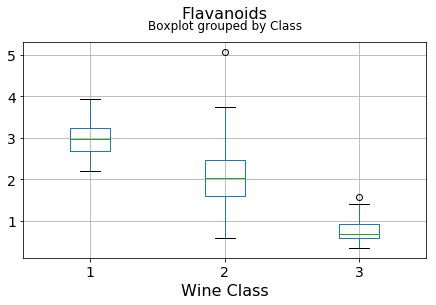

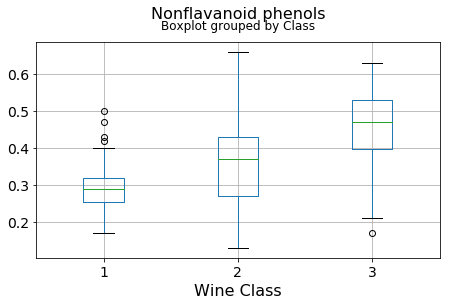

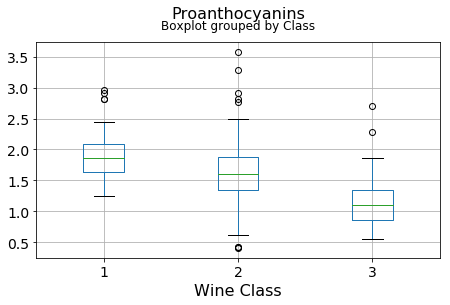

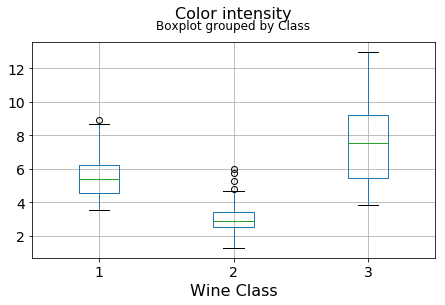

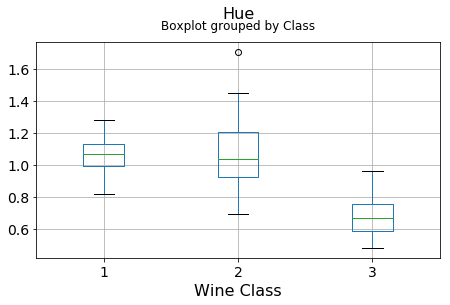

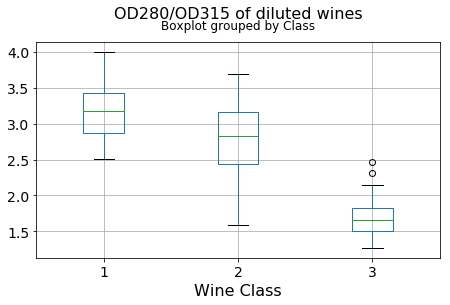

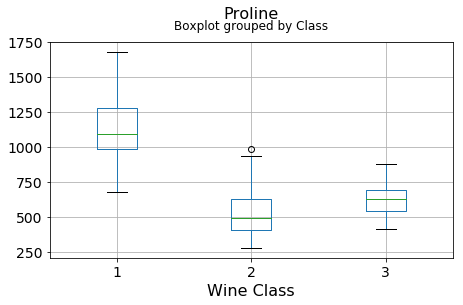

In [5]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**It can be seen that some features classify the wine labels pretty clearly.** For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

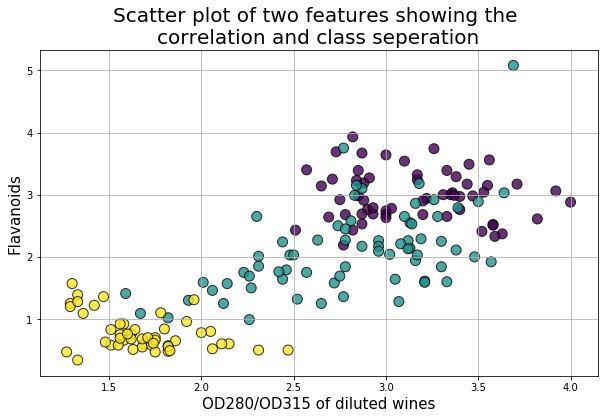

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=20)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

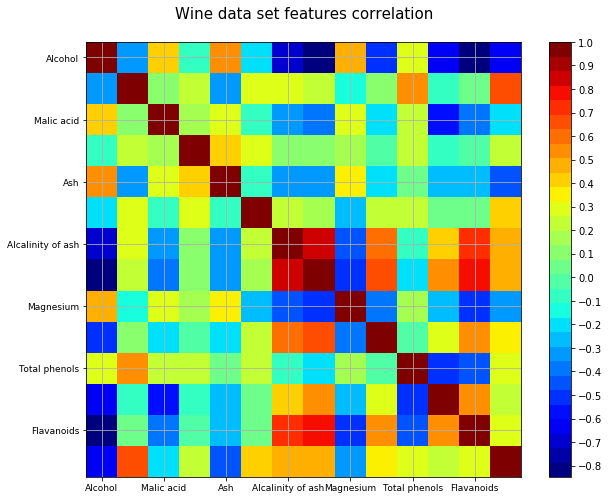

In [7]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

### Test/train split

In [8]:
from sklearn.model_selection import train_test_split
test_size=0.3 # Test-set fraction

In [9]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [10]:
print("Training set size:",X_train.shape)
print("Test set size:",X_test.shape)

Training set size: (124, 13)
Test set size: (54, 13)


### Classification using `GaussianNB` estimator

Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using **Maximum Likelihood Estimation**.

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nbc = GaussianNB()

In [13]:
nbc.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Prediction, classification report, and confusion matrix

In [14]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 54 test samples is 0


In [15]:
from sklearn.metrics import classification_report

In [16]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3
Class 1,21,0,0
Class 2,0,20,0
Class 3,0,0,13


This showed that **even in the presence of corrletation among features**, the Naive Bayes algorithm performed quite well and could seperate the classes easily.

### A somewhat larger problem

In [19]:
from time import time
from sklearn.datasets import make_classification as mc

In [20]:
X,y=mc(n_samples=10000,n_features=100,n_classes=5,flip_y=0.05,class_sep=1.75,n_informative=90)

In [21]:
X.shape

(10000, 100)

In [22]:
y=y.reshape(10000,1)

In [23]:
df=pd.DataFrame(np.hstack((X,y)),columns=['X'+str(i) for i in range(1,101)]+['Class'])

In [24]:
df['Class']=df['Class'].apply(int)

In [25]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X92,X93,X94,X95,X96,X97,X98,X99,X100,Class
0,-2.094703,-5.206786,-1.004749,1.366834,-3.697672,5.110649,5.653510,-0.826242,1.976365,6.492903,...,14.962512,5.116345,0.002054,9.202946,-4.108256,-1.833963,4.329271,-3.037164,2.499749,0
1,4.444491,5.362814,-4.455114,-0.312125,0.970008,-3.406217,0.855912,0.241852,4.933526,-1.255431,...,-9.052084,0.837802,1.629626,-1.498448,-5.694877,1.627229,6.753067,-1.674015,2.906399,1
2,-7.348302,0.695945,1.872647,3.707558,-5.820931,-1.225536,-4.171013,2.141597,6.881388,-0.927884,...,1.825363,1.715904,-11.585398,0.574823,1.954535,0.822452,-3.620998,-5.633141,3.849200,4
3,4.507251,-13.886376,7.920252,-7.461859,-5.239788,5.317062,-4.174282,-5.347947,1.676784,-1.285174,...,-3.457022,-1.926232,-12.982102,-1.020130,6.508053,-9.902305,5.312161,11.605348,-6.197835,2
4,12.464673,9.549816,6.160113,5.123970,4.474326,-9.221634,-6.925152,-3.476049,0.460229,-10.003202,...,6.193588,0.013440,1.542563,-6.111839,-0.441962,7.818419,-0.193510,0.371640,-1.758366,0


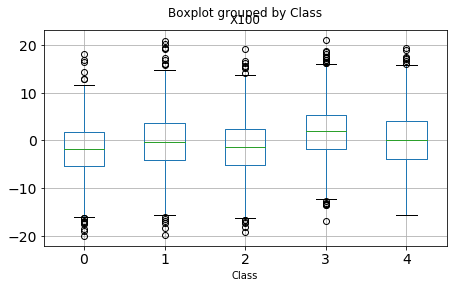

In [26]:
df.boxplot('X100',by='Class',figsize=(7,4),fontsize=14)
plt.show()

In [27]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

print("Training set size:",X_train.shape)
print("Test set size:",X_test.shape)

Training set size: (7000, 100)
Test set size: (3000, 100)


In [28]:
nbc = GaussianNB()

In [29]:
t1= time()
nbc.fit(X_train,y_train)
t2=time()
t_nb = round(t2-t1,4)
print(f"Fitting took {t_nb} seconds.")

Fitting took 0.0321 seconds.


In [30]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 3000 test samples is 624


In [31]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3','Class 4','Class 5'], 
                    columns=['Class 1','Class 2',' Class 3','Class 4','Class 5'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3,Class 4,Class 5
Class 1,464,39,31,28,54
Class 2,31,494,40,28,17
Class 3,32,19,467,25,23
Class 4,26,30,33,490,12
Class 5,25,33,44,54,461


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_pred)

0.792

### Neural net

In [34]:
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [35]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

In [36]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, 
                  dropout_prob=0.25, activation_func='relu', 
                  learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(num_classes, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=keras.optimizers.SGD(lr=learning_rate)
    if optimizer=='Adam':
        optimizer=keras.optimizers.Adam(lr=learning_rate)
    if optimizer=='RMSprop':
        optimizer=keras.optimizers.RMSprop(lr=learning_rate)
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [37]:
def run_NN(model,X_train,y_train,X_val=None,y_val=None,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint  
    # train the model
    hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
                    verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['acc'],color='red')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

In [38]:
def test_NN(hist,X_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(X_test, y_test,verbose=0)[1]
    return score

In [39]:
dl = make_NN_model(input_dim=100,neuron_layer_1=15, neuron_layer_2=15,num_classes=5,learning_rate=0.05)

Epoch 1/50
7000/7000 [==============================] - 0s 49us/step - loss: 1.7286 - acc: 0.2046
Epoch 2/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.6150 - acc: 0.2009
Epoch 3/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.6120 - acc: 0.2060
Epoch 4/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.6056 - acc: 0.2117
Epoch 5/50
7000/7000 [==============================] - 0s 15us/step - loss: 1.6060 - acc: 0.2106
Epoch 6/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.6014 - acc: 0.2060
Epoch 7/50
7000/7000 [==============================] - 0s 18us/step - loss: 1.5996 - acc: 0.2156
Epoch 8/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.5874 - acc: 0.2131
Epoch 9/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.5873 - acc: 0.2219
Epoch 10/50
7000/7000 [==============================] - 0s 16us/step - loss: 1.5748 - acc: 0.2206
Epoch 11/50
7000/70

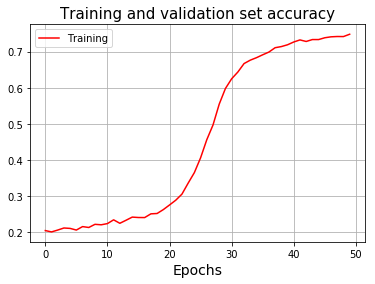

Training done, took 7.186039209365845 seconds


In [40]:
t1=time()
hist=run_NN(dl,X_train,dummy_y_train,verbosity=1,batch_size=128,
            num_epochs=50,plot_loss=True)
t2=time()
t_nn = t2-t1
print("Training done, took {} seconds".format(t_nn))

In [41]:
accuracy_nn=hist.model.evaluate(X_test,dummy_y_test)[1]

3000/3000 [==============================] - 0s 44us/step


### Naive Bayes and Neural Net prediction accuracy and time taken for training

In [42]:
print("Naive Bayes accuracy (test set):",round(accuracy_score(y_test,y_pred),2))
print("neural Net accuracy (test set):",round(accuracy_nn,2))

Naive Bayes accuracy (test set): 0.79
neural Net accuracy (test set): 0.83


In [43]:
print("Naive Bayes training time:",round(t_nb,2),"seconds")
print("neural Net training time:",round(t_nn,2),"seconds")

Naive Bayes training time: 0.03 seconds
neural Net training time: 7.19 seconds


### Food for thought

Deep learning may not be suitable for all kinds of business problem when you also have to consider training time and compute resources. Statistical learning methods like Naive Bayes, Logistic regression, k-nearest neighbor, offer exciting alternatives.